In [18]:
#CodSoft Internship
#Task 3: Iris Flower Classification
#Use the Iris flower dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. 
#Import Libraries
import numpy as np
import pandas as pd 
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import ydata_profiling as pandas_profiling
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets
import sklearn.metrics as metrics
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

In [2]:
#import the csv dataset to be used
df = pd.read_csv('iris dataset.csv', encoding='Latin1')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(3)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
#Generate a pandas profiling report 
report = pandas_profiling.ProfileReport(df)
display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 82.91it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

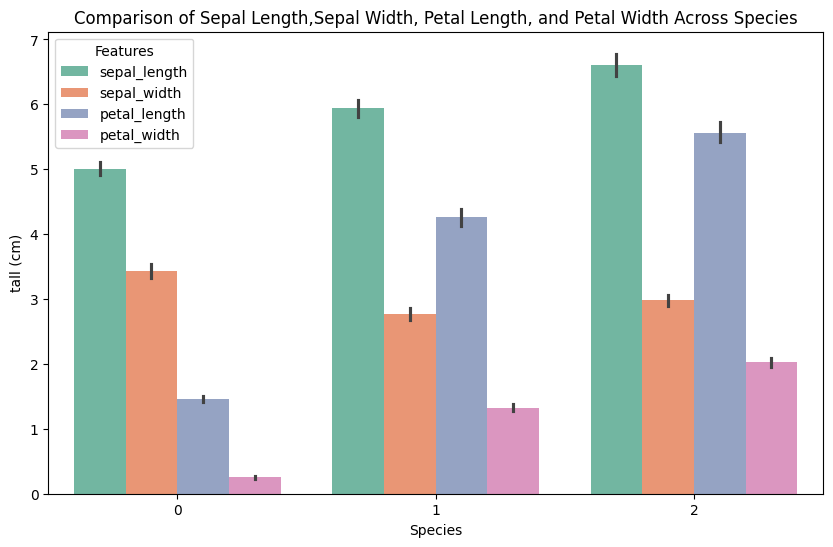

In [44]:
iris_melted = df.melt(id_vars='species', value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],var_name='Iris feature', value_name='tall')
plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='tall', hue='Iris feature', data=iris_melted, palette='Set2')
plt.title('Comparison of Sepal Length,Sepal Width, Petal Length, and Petal Width Across Species')
plt.xlabel('Species')
plt.ylabel('tall (cm)')
plt.legend(title='Features')
plt.show()

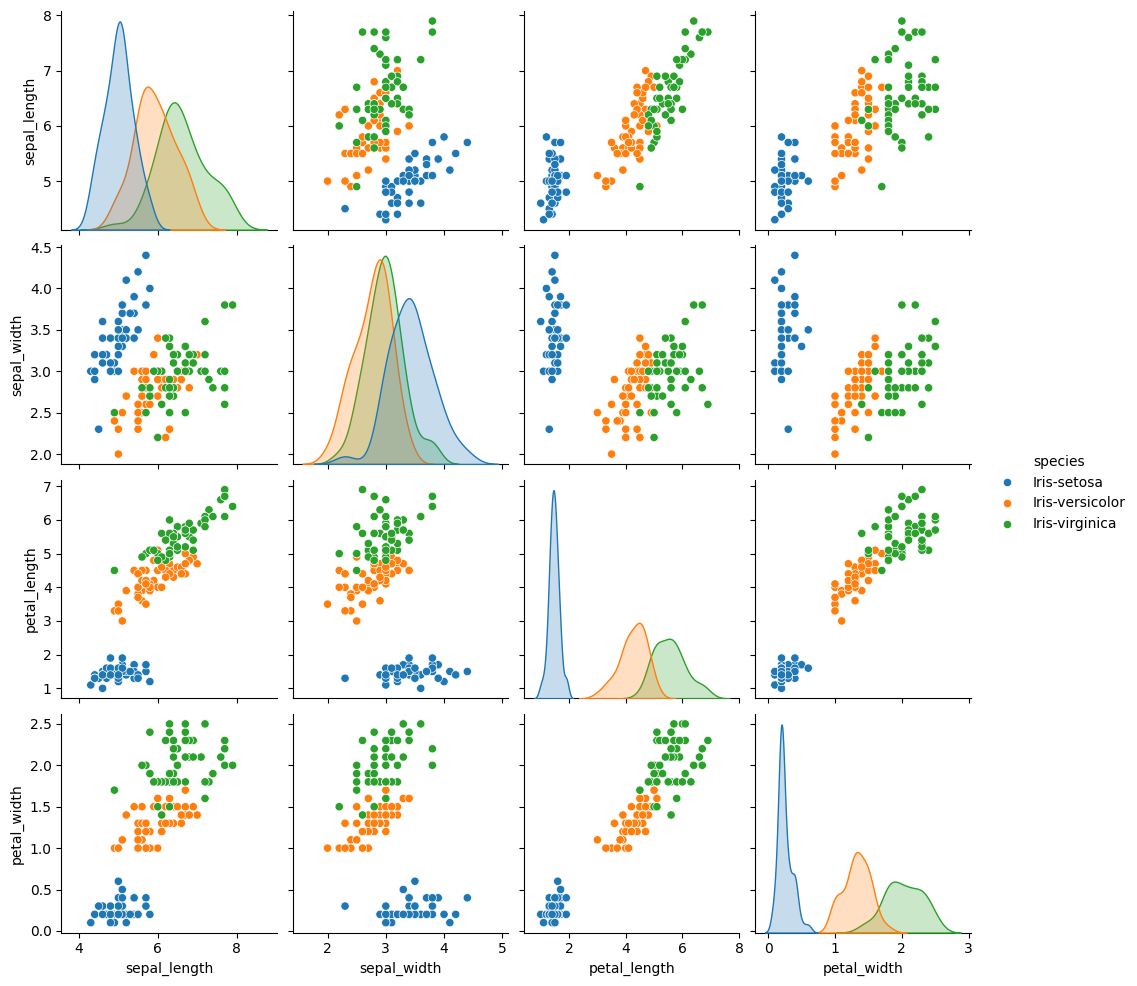

In [24]:
# Visualize the whole dataset

sns.pairplot(df, hue='species')
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

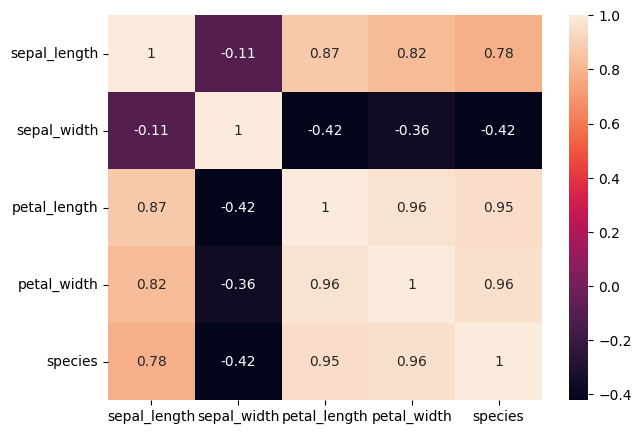

In [27]:
plt.figure(figsize=(7,5))
# Plotting the heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

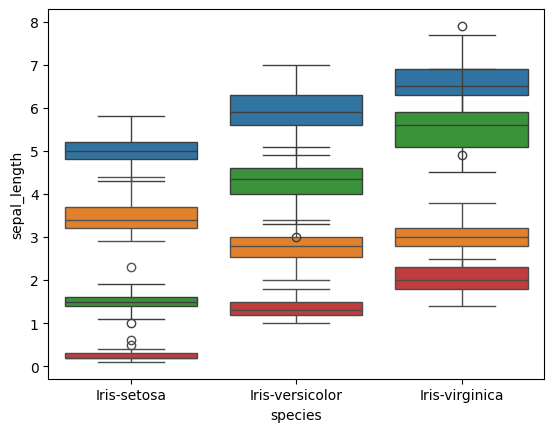

In [11]:
# Plotting the boxplot
sns.boxplot(data=df, x='species', y='sepal_length')
sns.boxplot(data=df, x='species', y='sepal_width')
sns.boxplot(data=df, x='species', y='petal_length')
sns.boxplot(data=df, x='species', y='petal_width')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features (X) and target (y)
X = df.drop(columns=['species'])
y = df['species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
svc=SVC(class_weight='balanced')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


In [15]:
print("train accuracy =", svc.score(X_train,y_train))
print("test accuracy =", svc.score(X_test,y_test))
print (classification_report(y_test,y_pred))

train accuracy = 0.9829059829059829
test accuracy = 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



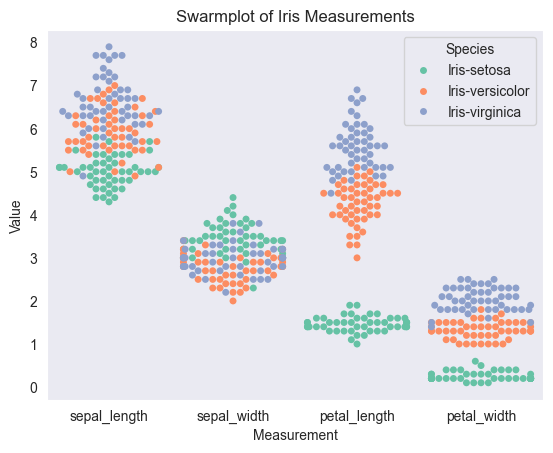

In [17]:
sns.set_style('dark')

# Melt the DataFrame to reshape it for plotting
melted_df = df.melt(id_vars='species', 
                    value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
                    var_name='measurement', 
                    value_name='value')

# Create the swarmplot
sns.swarmplot(x='measurement', 
              y='value', 
              hue='species', 
              data=melted_df, 
              palette='Set2')

plt.title('Swarmplot of Iris Measurements')
plt.xlabel('Measurement')
plt.ylabel('Value')
plt.legend(title='Species')
plt.show()